In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
df_train1= pd.read_csv('WDBC_Scaled_Train.csv')
df_train = df_train1.iloc[:, 1:]
# print(df_train)
X_train_orig = df_train.iloc[:, :-1]
y_train_orig = df_train.iloc[:, -1]


val1=pd.read_csv('WDBC_Scaled_Validation.csv')
test1=pd.read_csv('WDBC_Scaled_Test.csv')

val = val1.iloc[:, 1:]
test = test1.iloc[:, 1:]

X_val_orig = val.iloc[:, :-1]
y_val_orig = val.iloc[:, -1]

X_test_orig = test.iloc[:, :-1]
y_test_orig = test.iloc[:, -1]

In [6]:
print(X_val_orig)
print(X_train_orig)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.558831     -0.357198       -0.561519  -0.572329        -0.345656   
1      -0.398167     -1.334318       -0.415646  -0.465386         0.055752   
2      -1.269482     -0.056015       -1.282107  -1.065199        -0.758138   
3      -0.699412      0.100325       -0.690255  -0.685957         0.396949   
4      -0.403905     -1.704474       -0.453264  -0.456958        -0.554665   
..           ...           ...             ...        ...              ...   
109     1.529799     -0.175568        1.520409   1.495923         0.902170   
110    -0.065364     -0.787130       -0.140201  -0.161701        -1.772040   
111     0.201453     -1.122800        0.122704   0.082700        -0.771288   
112    -0.587521     -0.157175       -0.629649  -0.601390        -0.830807   
113    -0.544486     -1.263045       -0.541039  -0.552859        -1.023206   

     compactness_mean  concavity_mean  concave_points_mean  sym

K=1
Confusion Matrix:
[[70  1]
 [ 4 39]]
Accuracy: 0.9561, Precision: 0.9750, Recall: 0.9070, F1-score: 0.9398

K=7
Confusion Matrix:
[[71  0]
 [ 6 37]]
Accuracy: 0.9474, Precision: 1.0000, Recall: 0.8605, F1-score: 0.9250

K=11
Confusion Matrix:
[[71  0]
 [ 6 37]]
Accuracy: 0.9474, Precision: 1.0000, Recall: 0.8605, F1-score: 0.9250



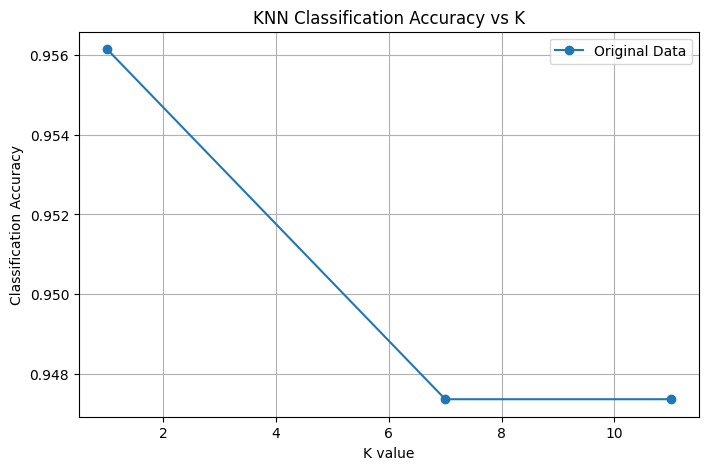

In [7]:
accuracy_scores = []
# Define K values
k_values = [1, 7, 11]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_orig, y_train_orig)
    y_pred = knn.predict(X_val_orig)

    cm = confusion_matrix(y_val_orig, y_pred)
    acc = accuracy_score(y_val_orig, y_pred)
    precision = precision_score(y_val_orig, y_pred)
    recall = recall_score(y_val_orig, y_pred)
    f1 = f1_score(y_val_orig, y_pred)

    print(f"K={k}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

    accuracy_scores.append(acc)
# 6. Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', label='Original Data')
plt.xlabel("K value")
plt.ylabel("Classification Accuracy")
plt.title("KNN Classification Accuracy vs K")
plt.legend()
plt.grid()
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_orig, y_train_orig)
y_pred = knn.predict(X_test_orig)

cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
precision = precision_score(y_test_orig, y_pred)
recall = recall_score(y_test_orig, y_pred)
f1 = f1_score(y_test_orig, y_pred)

print(f"K={1}")
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

K=1
Confusion Matrix:
[[68  4]
 [ 5 37]]
Accuracy: 0.9211, Precision: 0.9024, Recall: 0.8810, F1-score: 0.8916

